# **Classification Using Sklean**

This includes:

   1. Visualization of Data
   2. Preprocessing of Data
   3. Model Fitting using Scikit Learn
   4. Model Evaluation
   5. Result Analysis

In [12]:
#import libraris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [13]:
#load dataset
df = pd.read_csv("/content/titanic_dataset.csv")

# **Data Preprocessing and Visualization**

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


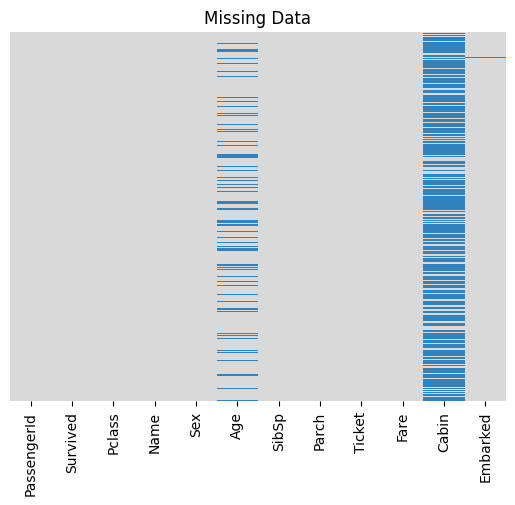

In [15]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [16]:
df.drop('Cabin', axis =1 , inplace=True)

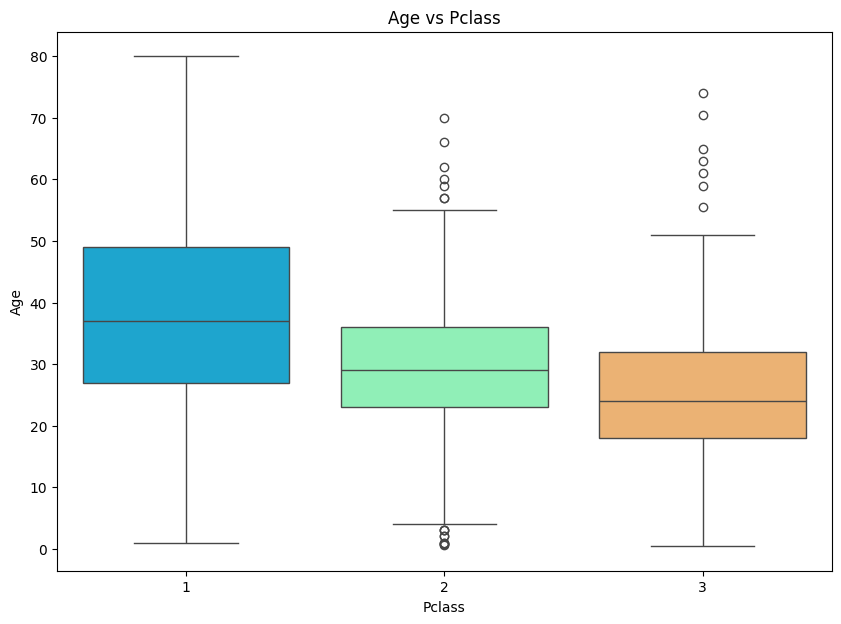

In [17]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'rainbow').set_title('Age vs Pclass')
plt.show()

In [18]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
      return Age


# Apply the function to the Age column
df['Age']=df[['Age','Pclass']].apply(impute_age, axis =1 )

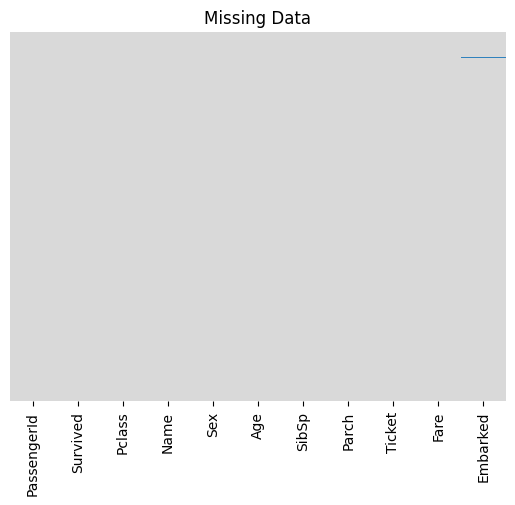

In [19]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [20]:
df.dropna(inplace = True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#Remove unnecessary columns
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [25]:
#Convert object to category data type
object = ['Sex', 'Embarked']

for colname in object:
  df[colname] = df[colname].astype('category')

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [27]:
#Remove Passanger id
df.drop('PassengerId', axis = 1, inplace = True)

# **Getting Model Ready**

In [28]:
df.shape

(889, 8)

In [29]:
#Identify categorical features
df.select_dtypes(include = 'category').columns

Index(['Sex', 'Embarked'], dtype='object')

In [30]:
#convert categorical variables into dummy variables
sex = pd.get_dummies(df['Sex'],drop_first = True)
embarked = pd.get_dummies(df['Embarked'],drop_first = True)


In [31]:
df = pd.concat([df,sex,embarked],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
 8   male      889 non-null    bool    
 9   Q         889 non-null    bool    
 10  S         889 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(4)
memory usage: 53.2 KB


In [33]:
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# **Machine Learning**


In [35]:
# Traget Variabl Splitting
x = df.drop('Survived', axis = 1)

y = df['Survived']

In [36]:
x.shape

(889, 8)

In [37]:
y.shape

(889,)

In [38]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()
x_transform = pre_process.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size= .20, random_state = 101)

In [40]:
x_train.shape

(711, 8)

# **1. Logistic Regression**

# **Model Trainig**

In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

# **Model Evaluation**

In [43]:
from sklearn.metrics import accuracy_score

y_pred_log_reg = log_reg.predict(x_test)

In [44]:
#Check Accuracy Score
print("Logistic Regression")
print('----'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg)*100,2)
print('Accuracy', log_reg_accuracy, '%')

Logistic Regression
------------------------------------------------------------------------------------------------------------------------
Accuracy 82.02 %


# **2. Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree Classifier")
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)


Decision Tree Classifier


DecisionTreeClassifier()

# **Model Evaluation**

In [49]:
from sklearn.metrics import accuracy_score
y_dtree_pred = dtree.predict(x_test)

print('Decision Tree Classifier')
# Accuracy
print('--'*30)

dtree_accuracy = round(accuracy_score(y_test, y_dtree_pred)*100, 2)
print('Accuracy', dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 77.53 %


# **3. Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier")
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

# **Model Evaluation**

In [53]:
from sklearn.metrics import accuracy_score
y_rf_pred = rf.predict(x_test)

print('Random Forest Classifier')
print('--'*30)

rf_accuracy = round(accuracy_score(y_test, y_rf_pred)*100,2)
print('Accuracy', rf_accuracy, '%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 81.46 %


# **4. Gradient Boosting**

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
print('Gradient Boosting Classifier')
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)


Gradient Boosting Classifier


GradientBoostingClassifier()

# **Model Evaluation**

In [57]:
from sklearn.metrics import accuracy_score
y_gb_pred = gb.predict(x_test)

print('Gradient Boosting Classifier')
print('--'*30)

gb_accuracy = round(accuracy_score(y_test, y_gb_pred)*100,2)
print('Accuracy', gb_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.27 %


In [58]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": dtree_accuracy,
    "Random Forest Classifier": rf_accuracy,
    "Gradient Boosting Classifier": gb_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 84.27
2. Logistic Regression: 82.02
3. Random Forest Classifier: 81.46
4. Decision Tree Classifier: 77.53
